# A2: Bias in Data 

The goal of this project is to identify potential sources of bias in two datasets, "Wikipedia Talk Labels: Toxicity” and "Wikipedia Talk Labels: Personal Attacks", from the Wikipedia Talk corpus, and to perform an exploratory data analysis based on those data. The analysis is done in a Jupyter Notebook including a description about some implications of the bias and some suggestions on correcting those bias and reducing negative consequences. 

## Step 0: Background Research

The two datasets can be accessed through [Figshare](https://figshare.com/projects/Wikipedia_Talk/16731) and the schema and descriptions can be found [here](https://meta.wikimedia.org/wiki/Research:Detox/Data_Release): 

1. [Toxicity Figshare dataset](https://figshare.com/articles/Wikipedia_Talk_Labels_Toxicity/4563973): over 100k labeled discussion comments from English Wikipedia by multiple annotators via Crowdflower on whether it is a toxic or healthy contribution with some demographic data for each crowd-worker.
2. [Personal Attacks Figshare dataset](https://figshare.com/articles/Wikipedia_Talk_Labels_Personal_Attacks/4054689): over 100k labeled discussion comments from English Wikipedia by multiple annotators via Crowdflower on whether it contains a personal attack with some demographic data for each crowd-worker. 

For your information, you can learn more details about the project on [Detox wiki page](https://meta.wikimedia.org/wiki/Research:Detox) and [perspective API repository on GitHub](https://github.com/conversationai/perspectiveapi/wiki/perspective-hacks).

## Step 1: Select and Perform Analysis

First, I imported the python libraries that I would use throughout the whole exploratory analysis.

In [174]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Second, I loaded the 6 source data files in TSV into data frames and did some preliminary data cleaning for them. Note that each of the datasets contains three types of files: annotations, annotated comments, and worker demographics.

In [175]:
# load the toxicity dataset
tox_annotations = pd.read_csv("./4563973/toxicity_annotations.tsv", sep='\t')
tox_comments = pd.read_csv("./4563973/toxicity_annotated_comments.tsv", sep='\t')
tox_demographics = pd.read_csv("./4563973/toxicity_worker_demographics.tsv", sep='\t')

In [176]:
# load the personal attacks dataset
att_annotations = pd.read_csv("./4054689/attack_annotations.tsv", sep='\t')
att_comments = pd.read_csv("./4054689/attack_annotated_comments.tsv", sep='\t')
att_demographics = pd.read_csv("./4054689/attack_worker_demographics.tsv", sep='\t')

I checked the unique number of rev_id and worker_id in the three data frames to make sure I can use inner join to merge all data frames. I then merged the three types of data files for both toxicity and personal attack datasets. 

In [177]:
len(tox_comments['rev_id'].unique()), len(tox_annotations['rev_id'].unique())

(159686, 159686)

In [178]:
len(att_comments['rev_id'].unique()), len(att_annotations['rev_id'].unique())

(115864, 115864)

In [179]:
len(tox_annotations['worker_id'].unique()), len(tox_annotations['worker_id'].unique())

(4301, 4301)

In [180]:
len(att_annotations['worker_id'].unique()), len(att_annotations['worker_id'].unique())

(4053, 4053)

In [181]:
# merge the data files for toxicity dataset
tox_df = pd.merge(tox_annotations, tox_comments, how='inner', on=['rev_id']) 
tox_df = pd.merge(tox_df, tox_demographics, how='inner', on=['worker_id'])

In [182]:
# merge the data files for personal attack dataset
att_df = pd.merge(att_annotations, att_comments, how='inner', on=['rev_id']) 
att_df = pd.merge(att_df, att_demographics, how='inner', on=['worker_id'])

In [212]:
tox_df.head()

,rev_id,worker_id,toxicity,toxicity_score,comment,year,logged_in,ns,sample,split,gender,english_first_language,age_group,education
0,2232.0,723,0,0.0,This:NEWLINE_TOKEN:One can make an analogy in ...,2002,True,article,random,train,female,0,30-45,bachelors
1,37346.0,723,0,0.0,`If they are ``indisputable`` then why does th...,2002,True,article,random,train,female,0,30-45,bachelors
2,227181.0,723,0,0.0,"NEWLINE_TOKENNEWLINE_TOKENWell, Ayn Rand certa...",2002,True,article,random,train,female,0,30-45,bachelors
3,2810755.0,723,0,0.0,NEWLINE_TOKENNEWLINE_TOKENNEWLINE_TOKENNEWLINE...,2004,True,user,random,train,female,0,30-45,bachelors
4,7270696.0,723,0,0.0,NEWLINE_TOKENNEWLINE_TOKEN==Useful info==NEWLI...,2004,True,article,random,train,female,0,30-45,bachelors


In [184]:
att_df.head()

,rev_id,worker_id,quoting_attack,recipient_attack,third_party_attack,other_attack,attack,comment,year,logged_in,ns,sample,split,gender,english_first_language,age_group,education
0,37675,1362,0.0,0.0,0.0,0.0,0.0,`-NEWLINE_TOKENThis is not ``creative``. Thos...,2002,False,article,random,train,male,0,18-30,masters
1,3202092,1362,0.0,0.0,0.0,0.0,0.0,NEWLINE_TOKENNEWLINE_TOKENHi. I haven't used o...,2004,True,user,random,train,male,0,18-30,masters
2,4745553,1362,0.0,0.0,0.0,0.0,0.0,NEWLINE_TOKENJust look it up. Its obvious.,2004,False,user,random,train,male,0,18-30,masters
3,4855563,1362,0.0,0.0,0.0,0.0,0.0,NEWLINE_TOKENNEWLINE_TOKENI'm going to gather ...,2004,True,article,random,test,male,0,18-30,masters
4,8350378,1362,0.0,0.0,0.0,0.0,0.0,`NEWLINE_TOKENNEWLINE_TOKEN§ I got in touch wi...,2004,True,article,random,train,male,0,18-30,masters


Third, based on the merged data frames that I had, I started performing my exploratory analysis. I listed the two analyses and related research questions below. And I placed my analysis and implications after that for each analysis.

### Analysis 1: Analyzing the demographic information about the Crowdflower workers that is available in the dataset. 

For the first analysis, I only focused on one dataset (toxicity) and the the research questions I came up with are: 

1. What are gender, age group, first language, and education level distributions among crowworkers in the toxicity dataset? 
2. Does the demographic profile of the crowworkers match that of the general population?

I first created the value_counts series for each distribution and then draw the corresponding bar graph. In addition, I calculated the percentage of each group and put it in text next to the bar. I saved all graphs in png and put them in the [image]() folder. 

In [185]:
tox_gender = tox_df['gender'].value_counts()
tox_age = tox_df['age_group'].value_counts()
tox_language = tox_df['english_first_language'].value_counts()
tox_education = tox_df['education'].value_counts()

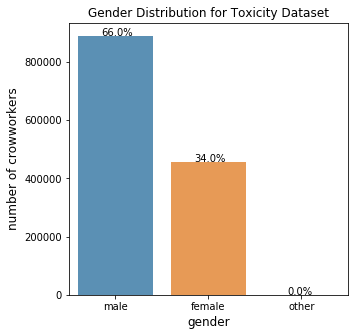

In [186]:
# draw the gender distribution
plt.figure(figsize=(5,5))
ax = sns.barplot(tox_gender.index, tox_gender.values, alpha=0.8)
plt.title('Gender Distribution for Toxicity Dataset')
plt.ylabel('number of crowworkers', fontsize=12)
plt.xlabel('gender', fontsize=12)
total = len(tox_df['gender'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2 - 0.15
        y = p.get_y() + p.get_height() + 0.02
        ax.annotate(percentage, (x, y))
plt.show()

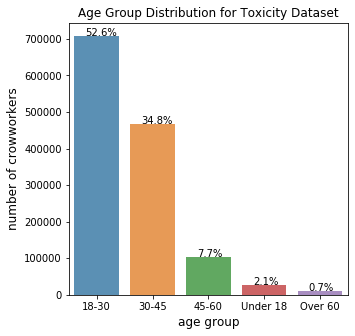

In [187]:
# draw the age group distribution
plt.figure(figsize=(5,5))
ax = sns.barplot(tox_age.index, tox_age.values, alpha=0.8)
plt.title('Age Group Distribution for Toxicity Dataset')
plt.ylabel('number of crowworkers', fontsize=12)
plt.xlabel('age group', fontsize=12)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2 - 0.2
        y = p.get_y() + p.get_height() + 0.02
        ax.annotate(percentage, (x, y))
plt.show()

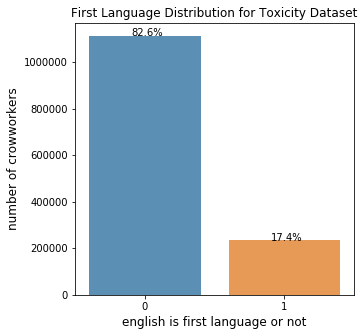

In [188]:
# draw the first language distribution
plt.figure(figsize=(5,5))
ax = sns.barplot(tox_language.index, tox_language.values, alpha=0.8)
plt.title('First Language Distribution for Toxicity Dataset')
plt.ylabel('number of crowworkers', fontsize=12)
plt.xlabel('english is first language or not', fontsize=12)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2 - 0.1
        y = p.get_y() + p.get_height() + 0.02
        ax.annotate(percentage, (x, y))
plt.show()

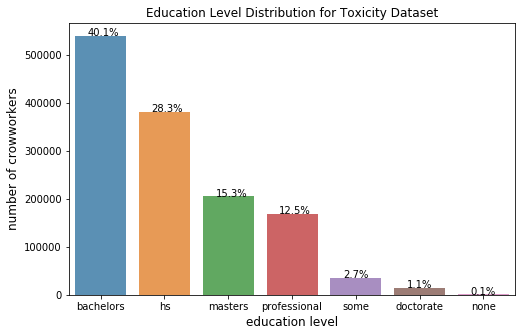

In [189]:
# draw the education level distribution
plt.figure(figsize=(8,5))
ax = sns.barplot(tox_education.index, tox_education.values, alpha=0.8)
plt.title('Education Level Distribution for Toxicity Dataset')
plt.ylabel('number of crowworkers', fontsize=12)
plt.xlabel('education level', fontsize=12)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2 - 0.2
        y = p.get_y() + p.get_height() + 0.02
        ax.annotate(percentage, (x, y))
plt.show()

**Results & Answers to the Questions:**

1. Based on the graphs above, I found that 1. 66.0% of the crowworkers are male, 2. 52.6% (majority) of the crowworkers are 18-30 years old, 3. 82.6% of the crowworkers do not have English as their first language, and 4. 40.1% of the crowworkers have bachelor’s degrees, 28.3% are in high school. Therefore, we can see that the numbers of crowworkers for gender, age group, first language, and education level are disproportionate.    
  
  
2. The distributions of crowworkers by gender, age group, first language, and education level do not represent the general population fairly. Therefore, the unequal distributions of crowworkers are likely to introduce some bias gender, age group, first language, and education level in the labelling process. For example, 82.6% of crowworks who are not English native speakers might understand the comments differently from the native speakers. As a result, when they label the comments, the misunderstanding can cause bias in this process and further would affect the training process for machine learning models.

### Analysis 2: Analyzing relationships between worker demographics and labeling behavior.

Beside the demographic profile information of the crowworkers, I was also interested in analyzing if the unequal distribution of crowworkers would lead to bias in labeling behaviors. In particular, I paid more attention to the following research questions:

1. How consistent are labelling behaviors among crowworkers with different ages?
2. Does there exist a difference between age groups when labeling comments as toxicity vs. personal attacks?

In this analysis, I joined the two datasets (toxicity and personal attack) on rev_id and I restricted my analysis only to the age group distribution because I saw a huge gap between groups in my first analysis. 

In [252]:
tox_att_df = pd.merge(tox_df, att_df, how='inner', on=['rev_id'], suffixes=('', '_y'))

After that, I got a combined data frame with differetn

In [253]:
tox_att_df = tox_att_df.loc[tox_att_df['age_group']==tox_att_df['age_group_y']]

In [254]:
tox_att_gender_df = tox_att_df.groupby(['age_group']).agg({"toxicity":"mean","attack":"mean"})

In [255]:
tox_att_gender_df.head()

,toxicity,attack
age_group,,
18-30,0.225963,0.206765
30-45,0.244187,0.236504
45-60,0.267368,0.285093
Over 60,0.277397,0.356164
Under 18,0.189655,0.147059


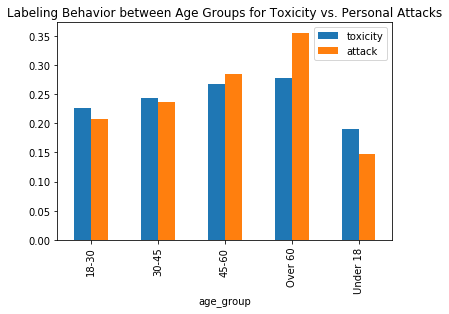

In [262]:
tox_att_gender_df.plot.bar(title='Labeling Behavior between Age Groups for Toxicity vs. Personal Attacks')

**Results & Answers to the Questions:**

1. Based on the graph above, I found that crowworkers with different age groups labeled the comment inconsistently. For example, crowwokers in the age group of over 60 are more likely to label comments as toxicity and attack than croworkerss in other age groups. On the contrary, crowworkers of age under 18 own the lowest average indicator value which represents whether the worker thought the comment contains any form of personal attack (or the comment is toxic in the toxicity dataset). As far as I'm concerned, older age groups might be more sensitive to toxic and attack comments compared to younger crowworker, which can produce bias in this process.
   
   
2. Since I joined the two datasets on rev_id and filtered the rows with the same age_group in the two datasets, I noticed that for the same comment, crowworkers under age 45 tend to label it as toxicty than as any forms of personal attack, and vice versa for crowworkers of age above 45. This difference would also introduce bias in the labeling process and this might be caused by different understanding of toxicity and personal attack between age groups. 

## Step 2: Discuss Further Implications

**1. Which, if any, of these demo applications would you expect the Perspective API—or any model trained on the Wikipedia Talk corpus—to perform well in? Why?**

I find the application [Create tools for commenters](https://www.perspectiveapi.com/#/home) very useful and I believe the models trained on the Wikipedia Talk corpus would perform well in this. The application can give commentors real-time feedback when their comments might contain any forms of toxicity, which could potentially decrease the number of comments labeled as indicator 1 (toxicity variable). Commentors would think more carefully when posting their comments and pay more attention to their langauge. Moreoever, this application would sort of filtering the comments for us before the labeling and training process. 

**2. What are some kinds of hostile speech that would be difficult to accurately detect using the approach used to train the Perspective API models?**
 
I think the comments posted in other languages would be difficult to detect using the approach used to train the Perspective API models. Here, other languages I mean are the languages also using English characters. It might be hard for crowworkers to detect these words as containing any forms of personal attack, toxicity or aggression. The options for labeling is objective so crowworkers with different demographic profiles might label the comments inconsistently, and in particular, they might not recognize the negative words in the comment. 

**3. Imagine you are one of the Google data scientists who maintains the Perspective API. If you wanted to improve the model or the API itself to make it work better for any of these purposes, how should they go about doing that?**

From the first analysis, we can see that datasets were annotated largely by non-native English-speaking crowworkers. So, in order to de-bias the dataset, when creating a classifier, the modeler can consider oversampling from other groups (native English speaking, female, differing age groups). This would mean equal sampling across different groups. Also, we can improve the model by increasing the dataset size because 100k instances might not be enough to train the model well.